In [2]:
from __future__ import division

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys

sys.path.append('/home/galina/PythonProjects/common_functions')
import peptides as pep

from matplotlib.patches import Rectangle

% matplotlib inline

In [3]:
data = pd.read_csv('18 EP dIm and dR Signals.csv')
data = data[~ (data['dIm EP Bad'] | data['dR EP Bad'])]
data.head()

,Grid Index,Peptide,Peptide Length,Peptide Weight,dIm EP Peptide Readout,dIm EP Peptide Median,dIm EP Peptide MAD,dIm EP Streptavidin Readout,dIm EP Streptavidin Median,dIm EP Streptavidin MAD,...,dR EP Peptide MAD,dR EP Streptavidin Readout,dR EP Streptavidin Median,dR EP Streptavidin MAD,dR EP Bad,dR RT Streptavidin Baseline Noise,dR RT Streptavidin Association Mean,dR RT Streptavidin Dissociation Mean,dR RT Streptavidin Association SNR,dR RT Bad
0,527,ATHPQFAT,8,871.949,0.001120,0.001142,0.000190,0.001197,0.001182,0.000122,...,0.000224,0.000355,0.000346,0.000204,False,0.000266,0.000825,0.000553,3.099982,False
1,734,ATHPQFAT,8,871.949,0.001381,0.001501,0.000182,0.001503,0.001487,0.000144,...,0.000206,0.000569,0.000698,0.000235,False,0.000185,0.001086,0.000779,5.865785,False
2,1033,ATHPQFAT,8,871.949,0.001809,0.001495,0.000217,0.001348,0.001667,0.000143,...,0.000231,0.000339,0.000896,0.000176,False,0.000112,0.001556,0.001509,13.933146,False
3,1668,ATHPQFAT,8,871.949,0.001379,0.001397,0.000195,0.001651,0.001444,0.000115,...,0.000171,0.000916,0.000569,0.000212,False,0.000159,0.000830,0.000804,5.234234,False
4,793,CTHPQFAT,8,904.009,0.000929,0.001053,0.000129,0.001015,0.001179,0.000193,...,0.000188,0.000636,0.000409,0.000239,False,0.000160,0.001053,0.000747,6.570487,False


# Peptide dR EP vs Peptide dIm EP

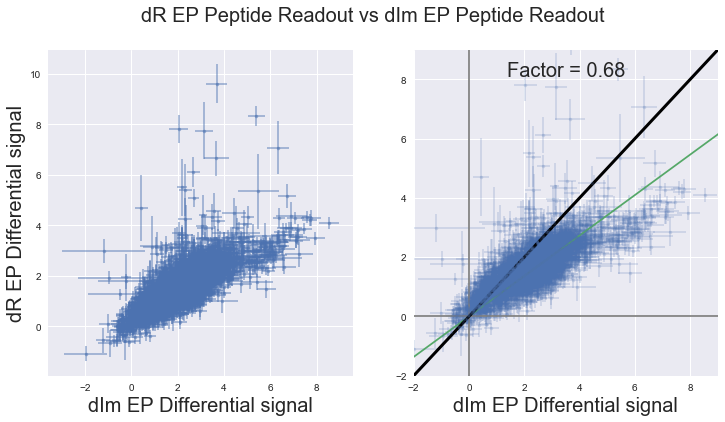

In [4]:
plt.figure(figsize = (12, 6))
plt.suptitle('dR EP Peptide Readout vs dIm EP Peptide Readout', fontsize = 20)

x = data['dIm EP Peptide Readout'] * 1000
y = data[ 'dR EP Peptide Readout'] * 1000
xerr = data['dIm EP Peptide MAD'] * 1000
yerr = data[ 'dR EP Peptide MAD'] * 1000

plt.subplot(1,2,1)
plt.errorbar(x = x, y = y, xerr = xerr, yerr = yerr,
             marker = '.',
             linestyle = '',
             alpha = 0.5)
plt.xlabel('dIm EP Differential signal', fontsize = 20)
plt.ylabel( 'dR EP Differential signal', fontsize = 20)

plt.subplot(1,2,2)
plt.errorbar(x = x, y = y, xerr = xerr, yerr = yerr,
             marker = '.',
             linestyle = '',
             alpha = 0.2)

a, _, _, _ = np.linalg.lstsq(x[:,np.newaxis], y)
plt.plot([-10, 10], [- a * 10, a * 10])
plt.title('Factor = ' + str(round(a[0], 2)), y = 0.9, fontsize = 20)

plt.xlabel('dIm EP Differential signal', fontsize = 20)

plt.plot([0,0], [-10, 10], 'grey')
plt.plot([-10,10], [0,0], 'grey')
plt.plot([-10,10], [-10,10], 'k-', lw = 3)
plt.xlim((-2, 9))
plt.ylim((-2, 9))
plt.show()

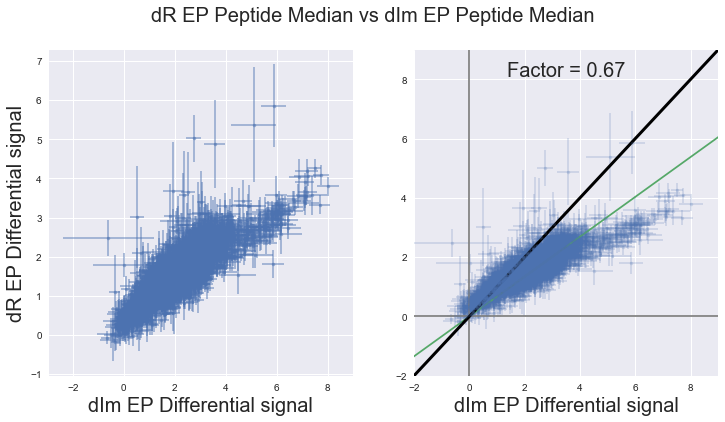

In [5]:
plt.figure(figsize = (12, 6))
plt.suptitle('dR EP Peptide Median vs dIm EP Peptide Median', fontsize = 20)

x = data['dIm EP Peptide Median'] * 1000
y = data[ 'dR EP Peptide Median'] * 1000
xerr = data['dIm EP Peptide MAD'] * 1000
yerr = data[ 'dR EP Peptide MAD'] * 1000

plt.subplot(1,2,1)
plt.errorbar(x = x, y = y, xerr = xerr, yerr = yerr,
             marker = '.',
             linestyle = '',
             alpha = 0.5)
plt.xlabel('dIm EP Differential signal', fontsize = 20)
plt.ylabel( 'dR EP Differential signal', fontsize = 20)

plt.subplot(1,2,2)
plt.errorbar(x = x, y = y, xerr = xerr, yerr = yerr,
             marker = '.',
             linestyle = '',
             alpha = 0.2)

a, _, _, _ = np.linalg.lstsq(x[:,np.newaxis], y)
plt.plot([-10, 10], [- a * 10, a * 10])
plt.title('Factor = ' + str(round(a[0], 2)), y = 0.9, fontsize = 20)

plt.xlabel('dIm EP Differential signal', fontsize = 20)
plt.plot([0,0], [-10, 10], 'grey')
plt.plot([-10,10], [0,0], 'grey')
plt.plot([-10,10], [-10,10], 'k-', lw = 3)
plt.xlim((-2, 9))
plt.ylim((-2, 9))
plt.show()

# Streptavidin dR EP vs Streptavidin dIm EP

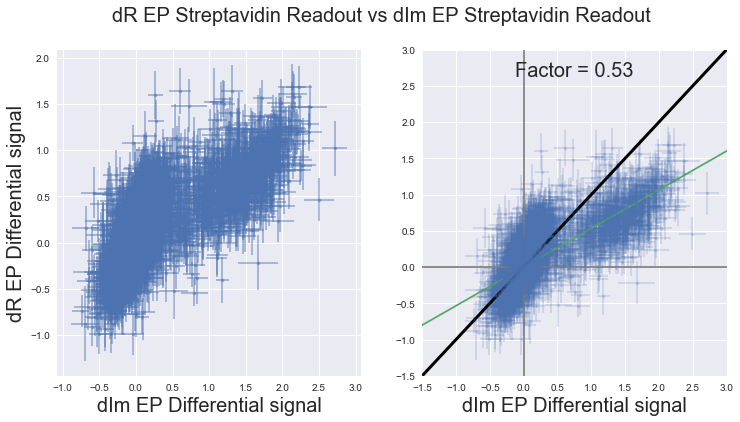

In [6]:
plt.figure(figsize = (12, 6))
plt.suptitle('dR EP Streptavidin Readout vs dIm EP Streptavidin Readout', fontsize = 20)

x = data['dIm EP Streptavidin Readout'] * 1000
y = data[ 'dR EP Streptavidin Readout'] * 1000
xerr = data['dIm EP Streptavidin MAD'] * 1000
yerr = data[ 'dR EP Streptavidin MAD'] * 1000

plt.subplot(1,2,1)
plt.errorbar(x = x, y = y, xerr = xerr, yerr = yerr,
             marker = '.',
             linestyle = '',
             alpha = 0.5)
plt.xlabel('dIm EP Differential signal', fontsize = 20)
plt.ylabel( 'dR EP Differential signal', fontsize = 20)

plt.subplot(1,2,2)
plt.errorbar(x = x, y = y, xerr = xerr, yerr = yerr,
             marker = '.',
             linestyle = '',
             alpha = 0.2)

a, _, _, _ = np.linalg.lstsq(x[:,np.newaxis], y)
plt.plot([-10, 10], [- a * 10, a * 10])
plt.title('Factor = ' + str(round(a[0], 2)), y = 0.9, fontsize = 20)

plt.xlabel('dIm EP Differential signal', fontsize = 20)
plt.plot([0,0], [-10, 10], 'grey')
plt.plot([-10,10], [0,0], 'grey')
plt.plot([-10,10], [-10,10], 'k-', lw = 3)
plt.xlim((-1.5, 3))
plt.ylim((-1.5, 3))
plt.show()

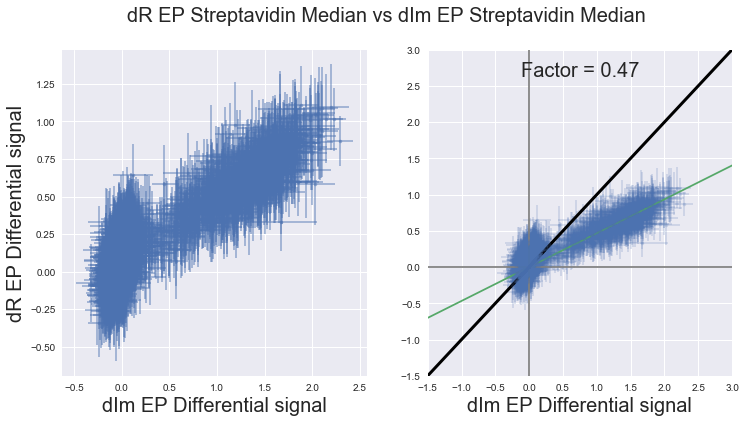

In [7]:
plt.figure(figsize = (12, 6))
plt.suptitle('dR EP Streptavidin Median vs dIm EP Streptavidin Median', fontsize = 20)

x = data['dIm EP Streptavidin Median'] * 1000
y = data[ 'dR EP Streptavidin Median'] * 1000
xerr = data['dIm EP Streptavidin MAD'] * 1000
yerr = data[ 'dR EP Streptavidin MAD'] * 1000

plt.subplot(1,2,1)
plt.errorbar(x = x, y = y, xerr = xerr, yerr = yerr,
             marker = '.',
             linestyle = '',
             alpha = 0.5)
plt.xlabel('dIm EP Differential signal', fontsize = 20)
plt.ylabel( 'dR EP Differential signal', fontsize = 20)

plt.subplot(1,2,2)
plt.errorbar(x = x, y = y, xerr = xerr, yerr = yerr,
             marker = '.',
             linestyle = '',
             alpha = 0.2)

a, _, _, _ = np.linalg.lstsq(x[:,np.newaxis], y)
plt.plot([-10, 10], [- a * 10, a * 10])
plt.title('Factor = ' + str(round(a[0], 2)), y = 0.9, fontsize = 20)

plt.xlabel('dIm EP Differential signal', fontsize = 20)
plt.plot([0,0], [-10, 10], 'grey')
plt.plot([-10,10], [0,0], 'grey')
plt.plot([-10,10], [-10,10], 'k-', lw = 3)
plt.xlim((-1.5, 3))
plt.ylim((-1.5, 3))
plt.show()

# Peptide dR EP vs Peptide dIm EP aggregated

In [8]:
data_agg = pd.read_csv('18 EP dIm and dR Signals aggregated.csv')

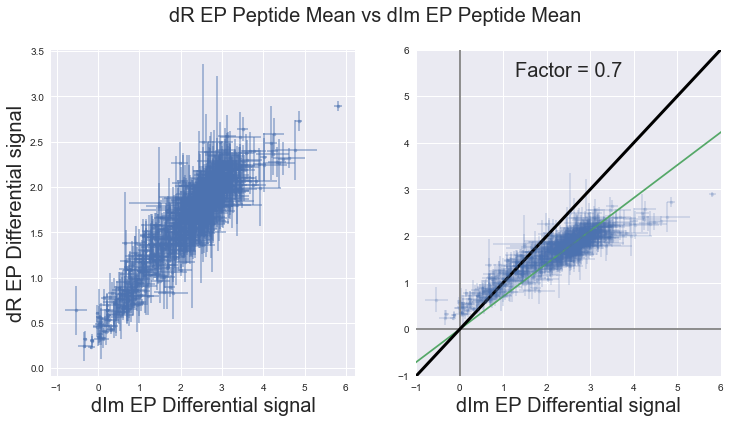

In [9]:
plt.figure(figsize = (12, 6))
plt.suptitle('dR EP Peptide Mean vs dIm EP Peptide Mean', fontsize = 20)

x = data_agg['dIm EP Peptide Mean'] * 1000
y = data_agg[ 'dR EP Peptide Mean'] * 1000
xerr = data_agg['dIm EP Peptide SE'] * 1000
yerr = data_agg[ 'dR EP Peptide SE'] * 1000

plt.subplot(1,2,1)
plt.errorbar(x = x, y = y, xerr = xerr, yerr = yerr,
             marker = '.',
             linestyle = '',
             alpha = 0.5)
plt.xlabel('dIm EP Differential signal', fontsize = 20)
plt.ylabel( 'dR EP Differential signal', fontsize = 20)

plt.subplot(1,2,2)
plt.errorbar(x = x, y = y, xerr = xerr, yerr = yerr,
             marker = '.',
             linestyle = '',
             alpha = 0.2)

a, _, _, _ = np.linalg.lstsq(x[:,np.newaxis], y)
plt.plot([-10, 10], [- a * 10, a * 10])
plt.title('Factor = ' + str(round(a[0], 2)), y = 0.9, fontsize = 20)

plt.xlabel('dIm EP Differential signal', fontsize = 20)
plt.plot([0,0], [-10, 10], 'grey')
plt.plot([-10,10], [0,0], 'grey')
plt.plot([-10,10], [-10,10], 'k-', lw = 3)
plt.xlim((-1, 6))
plt.ylim((-1, 6))
plt.show()

# Streptavidin dR EP vs Streptavidin dIm EP aggregated (only 8- and 9-long)

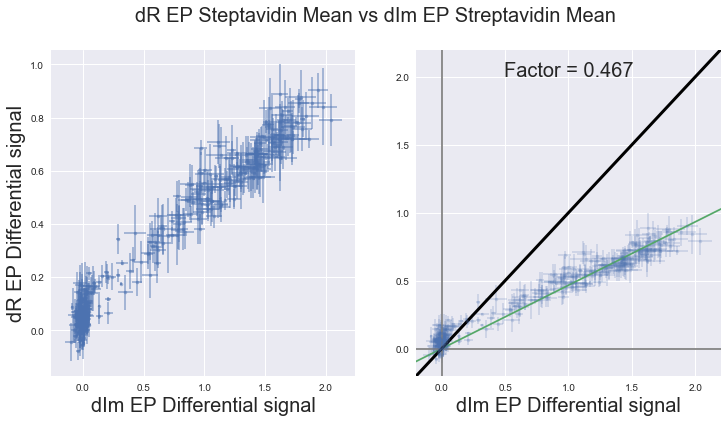

In [10]:
plt.figure(figsize = (12, 6))
plt.suptitle('dR EP Steptavidin Mean vs dIm EP Streptavidin Mean', fontsize = 20)

mask = data_agg['Peptide Length'].isin([8, 9])

x = data_agg[mask]['dIm EP Streptavidin Mean'] * 1000
y = data_agg[mask][ 'dR EP Streptavidin Mean'] * 1000
xerr = data_agg[mask]['dIm EP Streptavidin SE'] * 1000
yerr = data_agg[mask][ 'dR EP Streptavidin SE'] * 1000

plt.subplot(1,2,1)
plt.errorbar(x = x, y = y, xerr = xerr, yerr = yerr,
             marker = '.',
             linestyle = '',
             alpha = 0.5)
plt.xlabel('dIm EP Differential signal', fontsize = 20)
plt.ylabel( 'dR EP Differential signal', fontsize = 20)

plt.subplot(1,2,2)
plt.errorbar(x = x, y = y, xerr = xerr, yerr = yerr,
             marker = '.',
             linestyle = '',
             alpha = 0.2)

a, _, _, _ = np.linalg.lstsq(x[:,np.newaxis], y)
plt.plot([-10, 10], [- a * 10, a * 10])
plt.title('Factor = ' + str(round(a[0], 3)), y = 0.9, fontsize = 20)

plt.xlabel('dIm EP Differential signal', fontsize = 20)
plt.plot([0,0], [-10, 10], 'grey')
plt.plot([-10,10], [0,0], 'grey')
plt.plot([-10,10], [-10,10], 'k-', lw = 3)
plt.xlim((-0.2, 2.2))
plt.ylim((-0.2, 2.2))
plt.show()

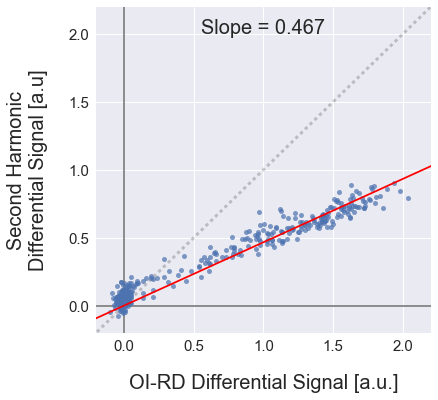

In [39]:
plt.figure(figsize = (6, 6))
sns.set(font_scale = 1.5)

mask = data_agg['Peptide Length'].isin([8, 9])

x = data_agg[mask]['dIm EP Streptavidin Mean'] * 1000
y = data_agg[mask][ 'dR EP Streptavidin Mean'] * 1000
xerr = data_agg[mask]['dIm EP Streptavidin SE'] * 1000
yerr = data_agg[mask][ 'dR EP Streptavidin SE'] * 1000

plt.errorbar(x = x, y = y, # xerr = xerr, yerr = yerr,
             marker = '.',
             linestyle = '',
             markersize = 10,
             alpha = 0.7)

a, _, _, _ = np.linalg.lstsq(x[:,np.newaxis], y)
plt.plot([-10, 10], [- a * 10, a * 10], color = 'red', zorder = 10)
plt.title('Slope = ' + str(round(a[0], 3)), y = 0.9, fontsize = 20)

plt.xlabel('OI-RD Differential Signal [a.u.]', fontsize = 20, labelpad = 20)
plt.ylabel('Second Harmonic\nDifferential Signal [a.u]', fontsize = 20, labelpad = 20)

plt.plot([0,0], [-10, 10], 'grey')
plt.plot([-10,10], [0,0], 'grey')
plt.plot([-10,10], [-10,10], 'k:', alpha = 0.2, lw = 3)
plt.xlim((-0.2, 2.2))
plt.ylim((-0.2, 2.2))
plt.show()